<h1>ML - Classification | Churn Prediction

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

<h3> Loading Data

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(5).T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


<h3> Data Pre-processing

In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head(5)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [6]:
df.shape

(7043, 21)

In [7]:
strings = list(df.dtypes[df.dtypes == 'object'].index)

for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

df.head(5).T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [8]:
df = df.drop('customerid', axis=1)

In [9]:
# Convert 'totalcharges' to numeric
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce') 


'churn': 0 = No Churn (customer stayed/retained) | 1 = Churn (customer left)

In [10]:
# Convert binary to numeric
binary_cols = ['churn', 'phoneservice', 'paperlessbilling', 'partner', 'dependents']
for col in binary_cols:
    df[col] = (df[col] == 'yes').astype(int)

In [11]:
# Create dummy variables for multi-category columns
multi_category_cols = ['gender', 'multiplelines', 'internetservice', 
                      'onlinesecurity', 'onlinebackup', 'deviceprotection',
                      'techsupport', 'streamingtv', 'streamingmovies',
                      'contract', 'paymentmethod']

df = pd.get_dummies(df, columns=multi_category_cols, drop_first=True)

In [12]:
df.head().T

,0,1,2,3,4
seniorcitizen,0,0,0,0,0
partner,1,0,0,0,0
dependents,0,0,0,0,0
tenure,1,34,2,45,2
phoneservice,0,1,1,0,1
paperlessbilling,1,0,1,0,1
monthlycharges,29.85,56.95,53.85,42.3,70.7
totalcharges,29.85,1889.5,108.15,1840.75,151.65
churn,0,0,1,0,1
gender_male,False,True,True,True,False


<h3> EDA

In [13]:
df.isnull().sum()

seniorcitizen                             0
partner                                   0
dependents                                0
tenure                                    0
phoneservice                              0
paperlessbilling                          0
monthlycharges                            0
totalcharges                             11
churn                                     0
gender_male                               0
multiplelines_no_phone_service            0
multiplelines_yes                         0
internetservice_fiber_optic               0
internetservice_no                        0
onlinesecurity_no_internet_service        0
onlinesecurity_yes                        0
onlinebackup_no_internet_service          0
onlinebackup_yes                          0
deviceprotection_no_internet_service      0
deviceprotection_yes                      0
techsupport_no_internet_service           0
techsupport_yes                           0
streamingtv_no_internet_service 

In [14]:
# Fixing missing values with median
df['totalcharges'].fillna(df['totalcharges'].median(), inplace=True)

C:\Users\Aayush Pradhan\AppData\Local\Temp\ipykernel_24460\1847198721.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['totalcharges'].fillna(df['totalcharges'].median(), inplace=True)


In [15]:
df.describe()

,seniorcitizen,partner,dependents,tenure,phoneservice,paperlessbilling,monthlycharges,totalcharges,churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2281.916928,0.265370
std,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2265.270398,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,402.225000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,1.000000


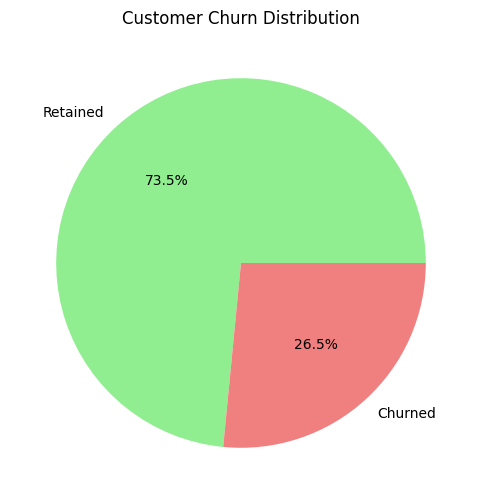

In [16]:
plt.figure(figsize=(8, 6))
plt.pie(df['churn'].value_counts(), labels=['Retained', 'Churned'], 
        autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Customer Churn Distribution')
plt.show()

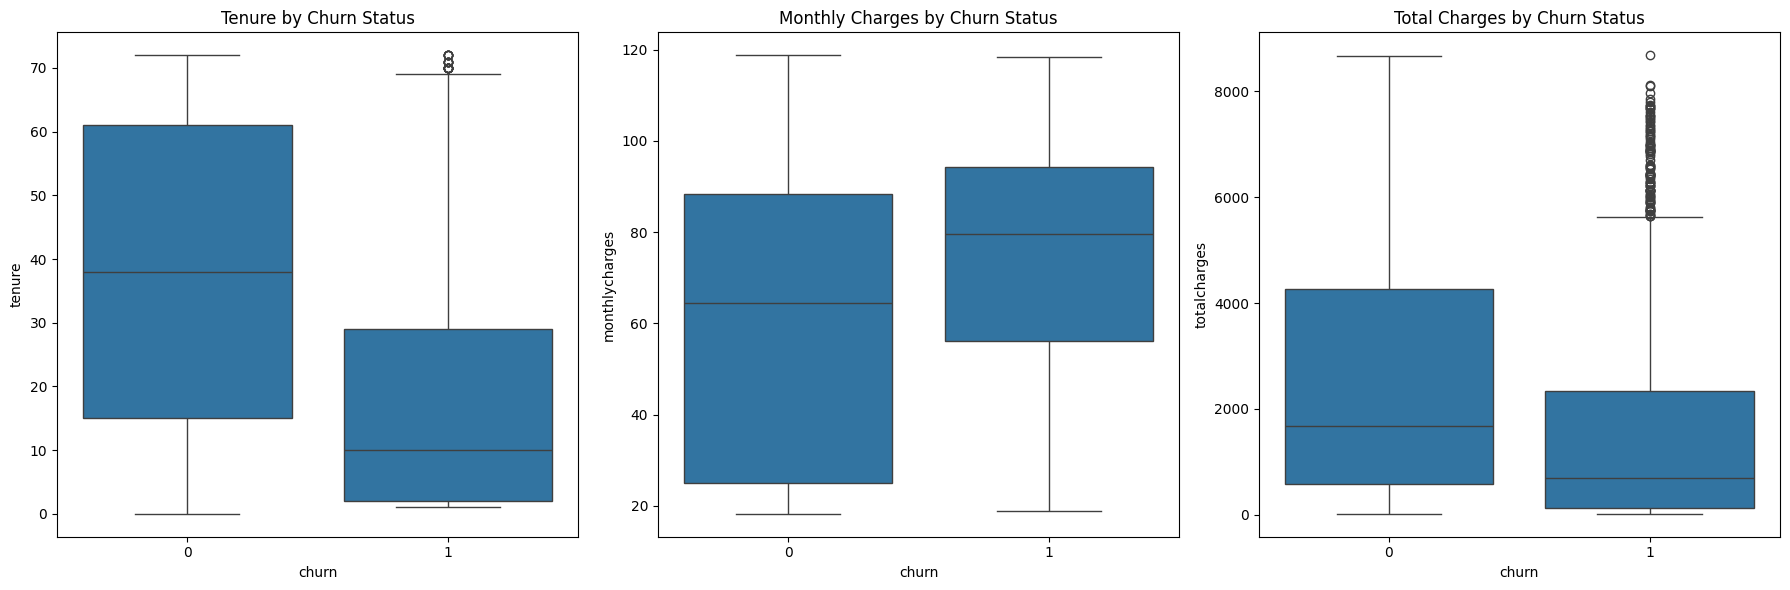

In [17]:
# Checking for outliers in numerical columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Tenure
sns.boxplot(x='churn', y='tenure', data=df, ax=axes[0])
axes[0].set_title('Tenure by Churn Status')

# Monthly Charges
sns.boxplot(x='churn', y='monthlycharges', data=df, ax=axes[1])
axes[1].set_title('Monthly Charges by Churn Status')

# Total Charges
sns.boxplot(x='churn', y='totalcharges', data=df, ax=axes[2])
axes[2].set_title('Total Charges by Churn Status')
plt.tight_layout()
plt.show()

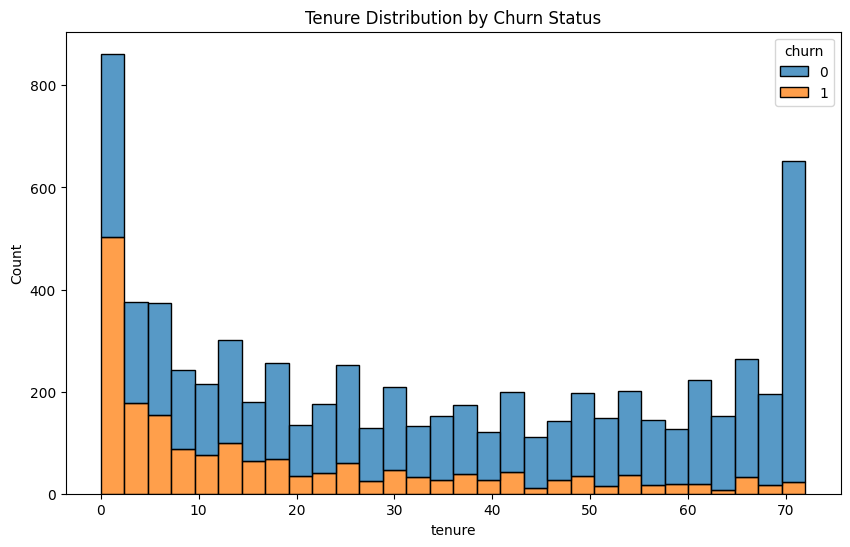

In [18]:
# Tenure Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tenure', hue='churn', multiple="stack", bins=30)
plt.title('Tenure Distribution by Churn Status')
plt.show()

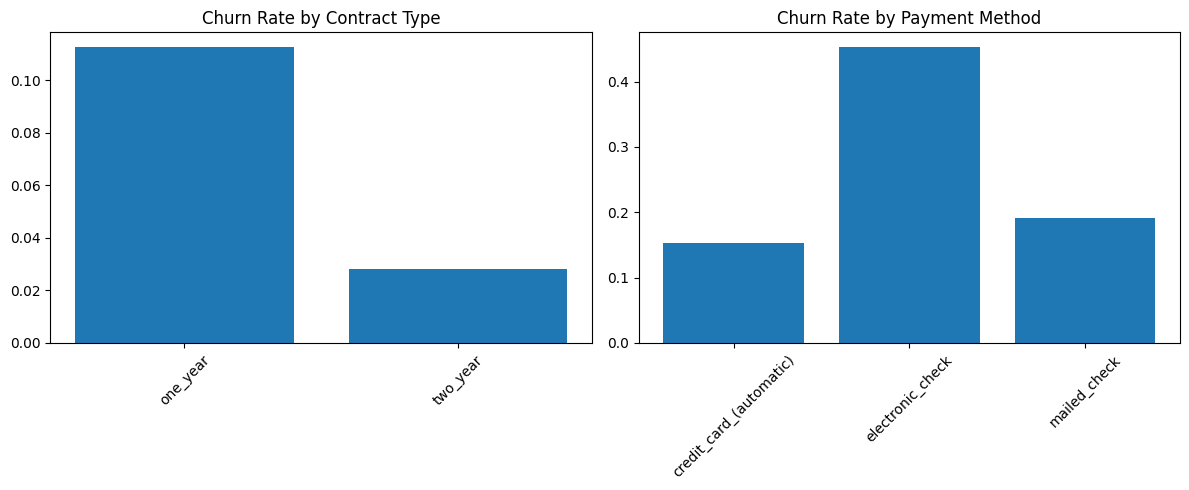

In [19]:
plt.figure(figsize=(12, 5))

# Contract Analysis
contract_columns = [col for col in df.columns if col.startswith('contract_')]
churn_by_contract = {}
for col in contract_columns:
    churn_by_contract[col.replace('contract_', '')] = df[df[col] == 1]['churn'].mean()

# Payment Method Analysis
payment_columns = [col for col in df.columns if col.startswith('paymentmethod_')]
churn_by_payment = {}
for col in payment_columns:
    churn_by_payment[col.replace('paymentmethod_', '')] = df[df[col] == 1]['churn'].mean()


plt.subplot(1, 2, 1)
plt.bar(churn_by_contract.keys(), churn_by_contract.values())
plt.title('Churn Rate by Contract Type')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(churn_by_payment.keys(), churn_by_payment.values())
plt.title('Churn Rate by Payment Method')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

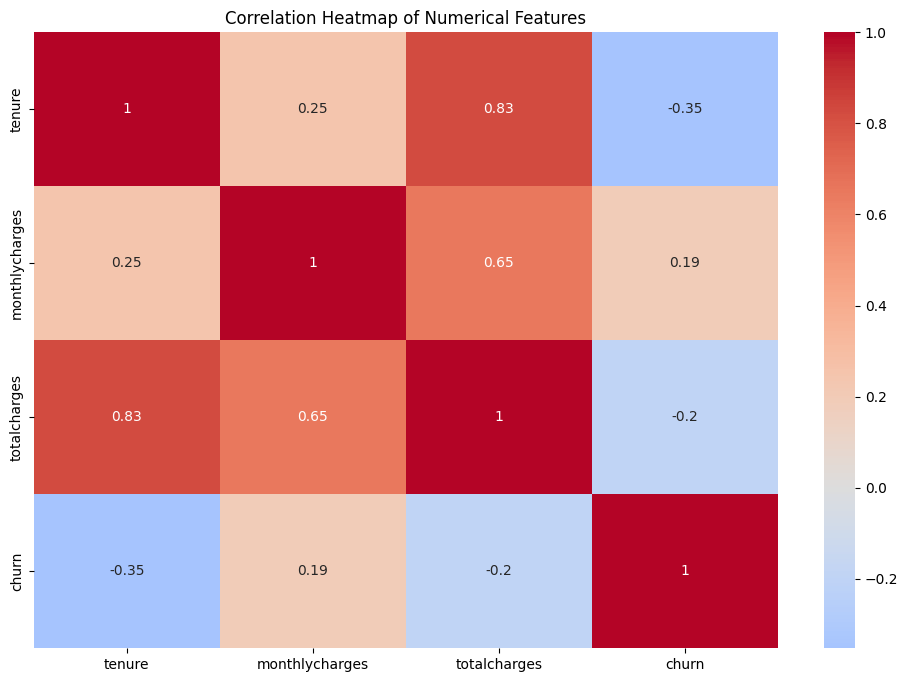

In [20]:
# Correlation
plt.figure(figsize=(12, 8))
numerical_cols = ['tenure', 'monthlycharges', 'totalcharges', 'churn']
correlation = df[numerical_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [21]:
# Churn Rate by Demographics
print("\nChurn Rate by Senior Citizen Status:\n")
print(df.groupby('seniorcitizen')['churn'].mean())

print("\nChurn Rate by Partner Status:")
print(df.groupby('partner')['churn'].mean())

print("\nChurn Rate by Dependents Status:")
print(df.groupby('dependents')['churn'].mean())


Churn Rate by Senior Citizen Status:

seniorcitizen
0    0.236062
1    0.416813
Name: churn, dtype: float64

Churn Rate by Partner Status:
partner
0    0.329580
1    0.196649
Name: churn, dtype: float64

Churn Rate by Dependents Status:
dependents
0    0.312791
1    0.154502
Name: churn, dtype: float64


<h5> Validation and Test Framework

In [23]:
n = len(df)

# Setting 60-20-20 split
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

n_val, n_test, n_train

(1408, 1408, 4227)

In [24]:
# Rearranging rows randomly
idx = np.arange(n)
np.random.shuffle(idx)

# Splitting data 
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

len(df_train), len(df_val), len(df_test)

(4227, 1408, 1408)

In [25]:
# Reseting index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [26]:
# Separate features (X) and target (y)
X_train = df_train.drop('churn', axis=1)
X_val = df_val.drop('churn', axis=1)
X_test = df_test.drop('churn', axis=1)

y_train = df_train['churn']
y_val = df_val['churn']
y_test = df_test['churn']

Scaling Numeric Features

In [27]:
numerical_cols = ['tenure', 'monthlycharges', 'totalcharges']

scaler = StandardScaler()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_val[numerical_cols] = scaler.transform(X_val[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Check mean and standard deviation of scaled features
print("Means of scaled numerical features in training set:")
print(X_train[numerical_cols].mean())
print("\nStandard deviations of scaled numerical features in training set:")
print(X_train[numerical_cols].std())

Means of scaled numerical features in training set:
tenure           -1.277531e-16
monthlycharges   -2.059179e-17
totalcharges     -6.723849e-17
dtype: float64

Standard deviations of scaled numerical features in training set:
tenure            1.000118
monthlycharges    1.000118
totalcharges      1.000118
dtype: float64


This indicates that StandardScaler has successfully:
- Centered the data around 0 (by subtracting the mean)
- Scaled the data to unit variance (by dividing by standard deviation)

Now  data is ready for modeling - Training a baseline model

<h5>1. Logistic Regression (Baseline Model)

In [31]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nOverall Accuracy: {accuracy:.4f}")

# Compare predicted vs actual for 10 random samples
random_indices = np.random.choice(len(y_test), 10, replace=False)

print("\nComparison of 10 random samples:")
print("Predicted vs Actual:")
comparison_df = pd.DataFrame({
    'Actual': y_test.iloc[random_indices],
    'Predicted': y_pred[random_indices]
})
print(comparison_df)

# Calculate success rate for these 10 samples
sample_success_rate = (comparison_df['Actual'] == comparison_df['Predicted']).mean()
print(f"\nSuccess rate for these 10 samples: {sample_success_rate:.2%}")

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1019
           1       0.68      0.56      0.61       389

    accuracy                           0.80      1408
   macro avg       0.76      0.73      0.74      1408
weighted avg       0.80      0.80      0.80      1408


Overall Accuracy: 0.8040

Comparison of 10 random samples:
Predicted vs Actual:
      Actual  Predicted
717        0          0
1027       0          0
115        0          0
1112       0          0
1001       0          0
892        1          1
1          0          1
907        0          0
1106       0          0
628        0          1

Success rate for these 10 samples: 80.00%


<h5>2. Decision Tree

In [34]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"\nOverall Accuracy: {accuracy_dt:.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1019
           1       0.50      0.48      0.49       389

    accuracy                           0.72      1408
   macro avg       0.65      0.65      0.65      1408
weighted avg       0.72      0.72      0.72      1408


Overall Accuracy: 0.7216


<h5>3. Tuned Decision Tree (hyperparameters)

In [36]:
# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Create Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Print best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Get the best model
best_dt = grid_search.best_estimator_

# Make predictions with the best model
y_pred_dt_tuned = best_dt.predict(X_test)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt_tuned))

# Calculate accuracy
accuracy_dt_tuned = accuracy_score(y_test, y_pred_dt_tuned)
print(f"\nOverall Accuracy: {accuracy_dt_tuned:.4f}")

Best parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score: 0.7951244282177179

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      1019
           1       0.67      0.40      0.50       389

    accuracy                           0.78      1408
   macro avg       0.74      0.66      0.68      1408
weighted avg       0.77      0.78      0.76      1408


Overall Accuracy: 0.7798


<h5>4. Random Forest

In [38]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nOverall Accuracy: {accuracy_rf:.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1019
           1       0.63      0.47      0.53       389

    accuracy                           0.78      1408
   macro avg       0.72      0.68      0.69      1408
weighted avg       0.76      0.78      0.76      1408


Overall Accuracy: 0.7756


<h5>5. Tuned Random Forest

In [39]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), 
                         param_grid, 
                         cv=5, 
                         scoring='accuracy')

grid_search.fit(X_train, y_train)

# Print best parameters and score
print("\nBest parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

best_rf = grid_search.best_estimator_
y_pred_rf_tuned = best_rf.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred_rf_tuned))

accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
print(f"\nOverall Accuracy: {accuracy_rf_tuned:.4f}")


Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation score: 0.8050582623414048
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1019
           1       0.67      0.52      0.58       389

    accuracy                           0.80      1408
   macro avg       0.75      0.71      0.72      1408
weighted avg       0.79      0.80      0.79      1408


Overall Accuracy: 0.7962


<h5>6. XGBoost

In [42]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"\nOverall Accuracy: {accuracy_xgb:.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1019
           1       0.60      0.50      0.55       389

    accuracy                           0.77      1408
   macro avg       0.71      0.69      0.70      1408
weighted avg       0.76      0.77      0.76      1408


Overall Accuracy: 0.7713


Ranking the 6 Models by Accuracy

## 1. Logistic Regression (Baseline)
**Overall Accuracy:** 80.40%  
- **Non-churn:** Precision **0.84**, Recall **0.90**  
- **Churn:** Precision **0.68**, Recall **0.56**  

## 2. Random Forest (Tuned)
**Overall Accuracy:** 79.62%  
- **Non-churn:** Precision **0.83**, Recall **0.90**  
- **Churn:** Precision **0.67**, Recall **0.52**  

## 3. Decision Tree (Tuned)
**Overall Accuracy:** 77.98%  
- **Non-churn:** Precision **0.80**, Recall **0.92**  
- **Churn:** Precision **0.67**, Recall **0.40**  

## 4. Random Forest (Default)
**Overall Accuracy:** 77.56%  
- **Non-churn:** Precision **0.81**, Recall **0.89**  
- **Churn:** Precision **0.63**, Recall **0.47**  

## 5. XGBoost (Default)
**Overall Accuracy:** 77.13%  
- **Non-churn:** Precision **0.82**, Recall **0.87**  
- **Churn:** Precision **0.60**, Recall **0.50**  

## 6. Decision Tree (Untuned)
**Overall Accuracy:** 72.16%  
- **Non-churn:** Precision **0.80**, Recall **0.82**  
- **Churn:** Precision **0.50**, Recall **0.48**  


Key Observations:

- Logistic Regression remains our best model (80.40%)

- All models perform better on non-churn prediction

- Consistent pattern of lower recall for churn class

- Tuning improved both Decision Tree and Random Forest

<h2>New Approach - Solving Class Imbalance

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop('churn', axis=1)
y = df['churn']

# Then apply SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, 
                                                    test_size=0.2, 
                                                    random_state=42)

# 1. Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}\n")

# 2. Decision Tree (Default)
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree (Default) Results:")
print(classification_report(y_test, y_pred_dt))
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}\n")

# 3. Decision Tree (Tuned)
param_grid = {
   'criterion': ['gini', 'entropy'],
   'max_depth': [3, 5, 7, 9],
   'min_samples_split': [2, 5, 10],
   'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
y_pred_dt_tuned = grid_search.predict(X_test)
print("Decision Tree (Tuned) Results:")
print(classification_report(y_test, y_pred_dt_tuned))
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt_tuned):.4f}\n")

# 4. Random Forest (Default)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest (Default) Results:")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}\n")

# 5. Random Forest (Tuned)
param_grid = {
   'n_estimators': [100, 200],
   'max_depth': [5, 10],
   'min_samples_split': [2, 5],
   'min_samples_leaf': [1, 2]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
y_pred_rf_tuned = grid_search.predict(X_test)
print("Random Forest (Tuned) Results:")
print(classification_report(y_test, y_pred_rf_tuned))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf_tuned):.4f}\n")

# 6. XGBoost (Default)
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost (Default) Results:")
print(classification_report(y_test, y_pred_xgb))
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")

c:\Users\Aayush Pradhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1021
           1       0.81      0.83      0.82      1049

    accuracy                           0.81      2070
   macro avg       0.81      0.81      0.81      2070
weighted avg       0.81      0.81      0.81      2070

Accuracy: 0.8116

Decision Tree (Default) Results:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1021
           1       0.79      0.79      0.79      1049

    accuracy                           0.79      2070
   macro avg       0.79      0.79      0.79      2070
weighted avg       0.79      0.79      0.79      2070

Accuracy: 0.7903

Decision Tree (Tuned) Results:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1021
           1       0.80      0.83      0.81      1049

    accuracy                           0.81      2070

# Comparing Results: Before vs. After SMOTE

## Best 3 Models **Before SMOTE**
1. **Logistic Regression:** 80.40%  
2. **Random Forest (Tuned):** 79.62%  
3. **Decision Tree (Tuned):** 77.98%  

## Best 3 Models **After SMOTE**
1. **XGBoost (Default):** 84.93%  
2. **Random Forest (Default):** 84.88%  
3. **Random Forest (Tuned):** 83.96%  

.

Key Improvements -

- Better balanced performance between classes.  

- Improved recall for the churn class (Previously **0.40-0.56**, now **0.83-0.87**).  

- Overall accuracy increased by approximately **4-5%**.  

- XGBoost and Random Forest now outperform Logistic Regression.  

